<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

# Descarga y manipulación de precios históricos 

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
___

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.cvs`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 al 31-12-2017 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [63]:
import numpy as np
import datetime
import scipy.stats as stats

# Importamos pandas
import pandas as pd

#algunas opciones para Pandas
# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 6)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.width', 78)
# pd.set_option('precision', 3)
pd.set_option('display.max_rows', 30)

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [2]:
# Función read_csv
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [3]:
# Cargamos hoja de calculo en un dataframe
file_name = 'Precios/AAPL.csv'
aapl = pd.read_csv(file_name)
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-29,204.399994,205.970001,203.860001,204.610001,201.966461,22204700
1,2019-04-30,203.059998,203.399994,199.110001,200.669998,198.077362,46534900
2,2019-05-01,209.880005,215.309998,209.229996,210.520004,207.800110,64827300
3,2019-05-02,209.839996,212.649994,208.130005,209.149994,206.447800,31996300
4,2019-05-03,210.889999,211.839996,210.229996,211.750000,209.014221,20892400
...,...,...,...,...,...,...,...
248,2020-04-22,273.609985,277.899994,272.200012,276.100006,276.100006,29264300
249,2020-04-23,275.869995,281.750000,274.869995,275.029999,275.029999,31203600
250,2020-04-24,277.200012,283.010010,277.000000,282.970001,282.970001,31627200
251,2020-04-27,281.799988,284.540009,279.950012,283.170013,283.170013,29236400


#### Anotación #1
- Quisieramos indizar por fecha.

In [4]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col=['Date'])
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-29,204.399994,205.970001,203.860001,204.610001,201.966461,22204700
2019-04-30,203.059998,203.399994,199.110001,200.669998,198.077362,46534900
2019-05-01,209.880005,215.309998,209.229996,210.520004,207.800110,64827300
2019-05-02,209.839996,212.649994,208.130005,209.149994,206.447800,31996300
2019-05-03,210.889999,211.839996,210.229996,211.750000,209.014221,20892400
...,...,...,...,...,...,...
2020-04-22,273.609985,277.899994,272.200012,276.100006,276.100006,29264300
2020-04-23,275.869995,281.750000,274.869995,275.029999,275.029999,31203600
2020-04-24,277.200012,283.010010,277.000000,282.970001,282.970001,31627200


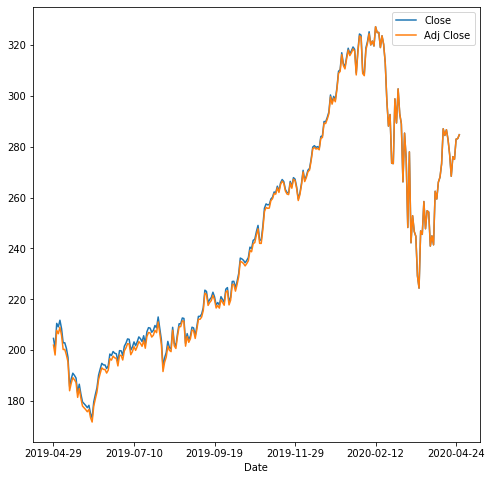

In [5]:
# Graficar precios de cierre y precios de cierre ajustados
import matplotlib.pyplot as plt
%matplotlib inline
aapl[['Close', 'Adj Close']].plot(figsize=(8,8))
plt.show()

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [113]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col=['Date'], usecols=['Date', 'Adj Close'])
aapl.columns = ['AAPL']
aapl

,AAPL
Date,
2019-04-29,201.966461
2019-04-30,198.077362
2019-05-01,207.800110
2019-05-02,206.447800
2019-05-03,209.014221
...,...
2020-04-22,276.100006
2020-04-23,275.029999
2020-04-24,282.970001


**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,...) y contengan los datos de precio de cierre.

> Leer archivos usando el paquete `os`: [link](https://realpython.com/working-with-files-in-python/)

In [6]:
import os

# List all files in a directory using os.listdir ---> os.path.isfile check if is a file
basepath = 'Precios'

files = [os.path.join(basepath, os.listdir(basepath)[i]) for i in range(len(os.listdir(basepath)))]
files

['Precios/NKE.csv', 'Precios/AAPL.csv', 'Precios/AMZN.csv', 'Precios/KO.csv']

In [120]:
# Read the data of Adj Close for each file
data = pd.concat([pd.read_csv(files[i], usecols= ['Date', 'Adj Close'], index_col= ['Date']) 
                  for i in range(len(files))], axis = 1 )
data.columns = os.listdir(basepath)
data

,NKE.csv,AAPL.csv,AMZN.csv,KO.csv
Date,,,,
2019-04-29,87.317513,201.966461,1938.430054,46.930996
2019-04-30,86.892097,198.077362,1926.520020,47.551323
2019-05-01,84.982697,207.800110,1911.520020,47.095772
2019-05-02,84.359428,206.447800,1900.819946,46.901920
2019-05-03,84.784836,209.014221,1962.459961,47.221779
...,...,...,...,...
2020-04-22,88.769997,276.100006,2363.489990,45.680000
2020-04-23,87.349998,275.029999,2399.449951,45.070000
2020-04-24,88.370003,282.970001,2410.219971,45.430000


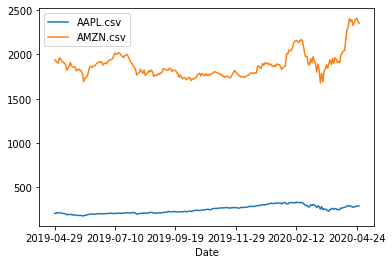

In [123]:
data[['AAPL.csv', 'AMZN.csv']].plot()

## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: **conda install pandas-datareader**;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [2]:
!conda install pandas-datareader

Solving environment: done

# All requested packages already installed.



In [5]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt

El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [6]:
# Función DataReader
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: se tiene acceso a su api a través de Stooq Index Data.
 - Quandl: solo permite descargar datos de equities estadounidenses de manera gratuita. Es la base de datos más completa. Si se desea usar hay que crear una cuenta para autenticarse en la API.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.
 
 > Enlace de las API disponibles de DataReader [link](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)

In [15]:
datetime.today()

datetime.datetime(2020, 11, 17, 11, 20, 34, 158386)

In [9]:
# Ejemplo google finance 
ticker = ['AAPL', 'KO']
source = 'stooq'
start = '2015-01-01'
end = datetime.today()
aapl_goo = web.DataReader(ticker, source, start=start, end=end)
aapl_goo

Attributes    Close              High              Low              Open  \
Symbols        AAPL      KO      AAPL      KO     AAPL       KO     AAPL   
Date                                                                       
2020-11-17  119.390  53.680  120.6741  53.750  118.960  53.0250  119.550   
2020-11-16  120.300  53.850  120.9900  54.620  118.146  53.2800  118.920   
2020-11-13  119.260  53.450  119.6717  53.500  117.870  52.8901  119.440   
2020-11-12  119.210  53.010  120.5300  53.210  118.570  52.6050  119.620   
2020-11-11  119.490  53.580  119.6300  54.300  116.440  53.3300  117.190   
...             ...     ...       ...     ...      ...      ...      ...   
2015-01-08   25.484  36.023   25.5440  36.074   24.750  35.6820   24.875   
2015-01-07   24.545  35.592   24.6370  35.690   24.295  35.2530   24.416   
2015-01-06   24.200  35.154   24.4650  35.550   23.828  34.9740   24.290   
2015-01-05   24.198  34.888   24.7370  35.575   24.008  34.8410   24.659   
2015-01-02   24.897  34.888   25.3780  35.105   24.448  34.6080   25.366   

Attributes             Volume            
Symbols         KO       AAPL        KO  
Date                                     
2020-11-17  53.660   74045023  14247639  
2020-11-16  54.500   91183018  14908181  
2020-11-13  53.250   81688586  12449444  
2020-11-12  53.050  103350674  15026961  
2020-11-11  53.930  112294954  17399922  
...            ...        ...       ...  
2015-01-08  35.753  260535344  26262397  
2015-01-07  35.420  175927997  16199615  
2015-01-06  35.111  288724613  20409129  
2015-01-05  35.344  282153705  31756696  
2015-01-02  34.991  233588715  11982896  

[1481 rows x 10 columns]

## - Precios desde `quandl`

>Página oficial de `quandl` para crear cuenta y tutorial de instalación de su api
> Recuerden que cuando se usa anaconda no se debe de usar el comando `pip` o `pip3` sino `conda`, por ejemplo en este caso sería `conda install quandl`

> https://docs.quandl.com/docs/python-installation

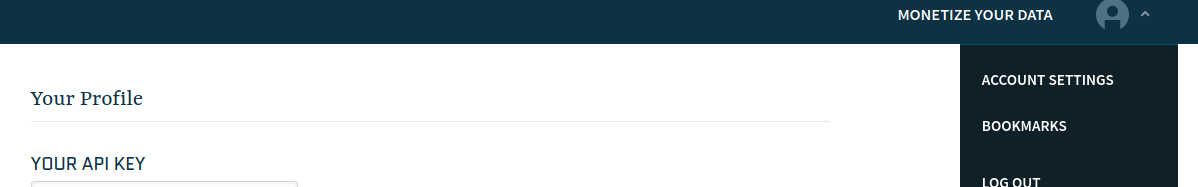

Tu api_key lo encuentras en los detalles de tu cuenta después de haber creado un usuario

In [8]:
!conda install quandl

Solving environment: done

# All requested packages already installed.



In [16]:
# Ejemplo quandl
import quandl
######################### USar la api key que les arroja la página de quandl
quandl.ApiConfig.api_key = "My9ygJsz7yTDx_9jcneH"

ticker = ['AAPL', 'MSFT', 'KO']
date = {'gte': '2016-01-01', 'lte': datetime.today() }
column = {'columns': ['ticker', 'date', 'Adj_close']}

data = quandl.get_table('WIKI/PRICES', qopts = column, ticker = ticker, date = date)# ticker = 'WIKI/AAPL' #'AAPL.US'

# Poner los índices como las fechas
data = data.set_index('date')
data
# Seleccionar los ADJ_CLOSE de ticker y renombrar las columnas
data_n = [data.loc[data['ticker'] == ti, 'adj_close'] for ti in ticker]
data_n = pd.concat(data_n, axis=1)
data_n.columns = ticker
data_n
#### data.loc[data['ticker']=='AAPL','adj_close']

,AAPL,MSFT,KO
date,,,
2016-01-04,101.783763,52.181598,40.047007
2016-01-05,99.233131,52.419653,40.188683
2016-01-06,97.291172,51.467434,39.971447
2016-01-07,93.185040,49.677262,39.310293
2016-01-08,93.677776,49.829617,39.206398
...,...,...,...
2018-03-21,171.270000,92.480000,43.000000
2018-03-22,168.845000,89.790000,42.760000
2018-03-23,164.940000,87.180000,42.330000


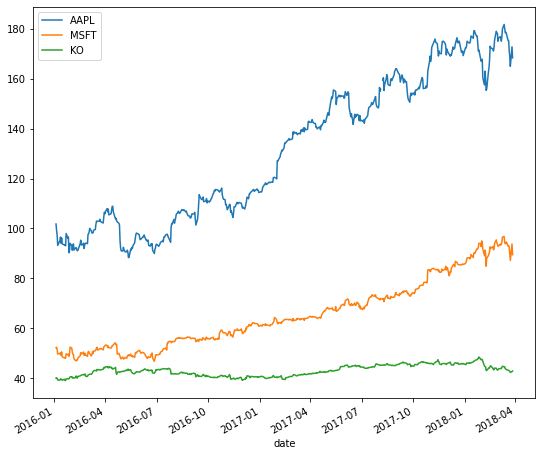

In [19]:
# Gráfica de precios
data_n.plot(figsize=(9,8))

### Uso de Pandas para bajar datos de Yahoo! Finance
* Intentamos con la función YahooDailyReader y con la función DataReader

In [ ]:
# help(web.YahooDailyReader)

In [25]:
# YahooDailyReader
ticker = ['AEROMEX.MX', 'GCARSOA1.MX']
start = '2015-01-01'
end = datetime.today()
aapl_yah = web.YahooDailyReader(ticker, start, end, interval='d').read()
aapl_yah['Adj Close']

Symbols,AEROMEX.MX,GCARSOA1.MX
Date,,
2015-01-02,19.389999,65.153351
2015-01-05,20.030001,62.496880
2015-01-06,19.570000,62.627373
2015-01-07,19.430000,64.044151
2015-01-08,20.840000,64.771179
...,...,...
2020-11-10,4.700000,43.290001
2020-11-11,4.820000,44.689999
2020-11-12,4.980000,44.560001


In [27]:
# Observar que se puede usar usando las dos librerías
closes = web.DataReader(name=ticker, data_source='yahoo', start=start, end=end)
closes['Adj Close']

Symbols,AEROMEX.MX,GCARSOA1.MX
Date,,
2015-01-02,19.389999,65.153351
2015-01-05,20.030001,62.496880
2015-01-06,19.570000,62.627373
2015-01-07,19.430000,64.044151
2015-01-08,20.840000,64.771179
...,...,...
2020-11-10,4.700000,43.290001
2020-11-11,4.820000,44.689999
2020-11-12,4.980000,44.560001


Para efectos del curso y debido a que en yahoo finance podemos tener acceso a activos de la bolsa méxicana vamos a utilizar de acá en adelante el paquete de DataReader y la siguiente función para descargar precios de distintos activos:

In [28]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [29]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['AAPL', 'MSFT', 'NVDA', '^GSPC']
start = '2018-01-01'
end = None
closes = get_adj_closes(tickers=ticker, start_date=start, end_date=end)
closes

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2018-01-02,41.105534,82.599319,197.754150,2695.810059
2018-01-03,41.098373,82.983727,210.769104,2713.060059
2018-01-04,41.289268,83.714119,211.880112,2723.989990
2018-01-05,41.759361,84.752014,213.675629,2743.149902
2018-01-08,41.604263,84.838486,220.222809,2747.709961
...,...,...,...,...
2020-11-11,119.489998,216.550003,536.719971,3572.659912
2020-11-12,119.209999,215.440002,538.270020,3537.010010
2020-11-13,119.260002,216.509995,531.880005,3585.149902


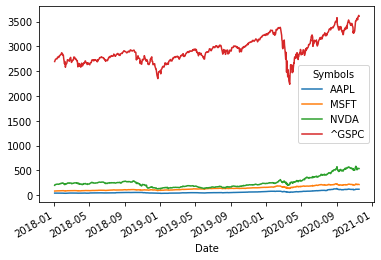

In [30]:
# Gráfica de datos
closes.plot()

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

Como se puede notar, en este caso se consideran tres activos 
- Nvidia:NVDA
- Apple: AAPL
- Microsoft: MSFT

y, el índice 

- Standard & Poor's: 500S&P500.

Todos almacenados en la variable *closes*.

El objeto *assets* tiene la característica *items*. Con estos, se pueden verificar los registros almacenados

In [31]:
closes.columns

Index(['AAPL', 'MSFT', 'NVDA', '^GSPC'], dtype='object', name='Symbols')

Acceder a alguna posición específica de la variable *closes*

In [32]:
# Usao de la función iloc
closes.iloc[0, 0]

41.105533599853516

Si deseamos encontrar los precios de cierre en una fecha específica usamos 

In [33]:
# Uso de la función loc
closes.loc['2018-01-02', 'AAPL']

41.105533599853516

O, finalmente, los valores del S&P500

In [34]:
# Selección de alguna columna
closes['AAPL']

Date
2018-01-02     41.105534
2018-01-03     41.098373
2018-01-04     41.289268
2018-01-05     41.759361
2018-01-08     41.604263
                 ...    
2020-11-11    119.489998
2020-11-12    119.209999
2020-11-13    119.260002
2020-11-16    120.300003
2020-11-17    119.389999
Name: AAPL, Length: 726, dtype: float64

### Actividad
Obtener datos históricos de
- GRUPO CARSO, S.A.B. DE C.V.
- GRUPO FINANCIERO INBURSA, S.A.B. DE C.V.
- GRUPO FINANCIERO BANORTE, S.A.B DE C.V.
- GRUPO AEROMÉXICO, S.A.B. DE C.V.

en el año 2014.

1. ¿Qué compañía reportó precios de cierre más altos en *2014-07-14*?
2. Obtener los precios de cierre de cada compañía en todo el año.
3. Comparar, para cada compañía, los precios de cierre entre *2014-01-02* y *2014-12-31*.

> Revisar los nombres de estas acciones en yahoo: https://finance.yahoo.com/

In [35]:
# nombre de los activos mexícanos en yahoo
ticker_mx = ['GCARSOA1.MX', 'GFINBURO.MX', 'GFNORTEO.MX', 'AEROMEX.MX']

start = '2014-01-02'
end = '2014-12-31'
assets_mx = get_adj_closes(tickers=ticker_mx, start_date=start, end_date=end)
assets_mx

Symbols,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,AEROMEX.MX
Date,,,,
2014-01-02,63.696423,32.456123,78.120354,18.049999
2014-01-03,64.046753,32.040485,78.864120,18.090000
2014-01-06,62.036949,31.173059,77.462074,18.469999
2014-01-07,61.557541,32.212166,77.744202,19.459999
2014-01-08,61.096577,31.344736,77.017525,18.990000
...,...,...,...,...
2014-12-24,68.471588,33.982063,69.379349,19.639999
2014-12-26,69.468933,34.320061,69.344826,19.629999
2014-12-29,69.823143,34.986908,70.026627,19.520000


In [36]:
# Encontrar los precios en la fecha 2014-07-14
assets_mx_20140714 = assets_mx.loc['2014-07-14']
assets_mx_20140714

Symbols
GCARSOA1.MX    67.414848
GFINBURO.MX    35.452789
GFNORTEO.MX    78.351700
AEROMEX.MX     22.070000
Name: 2014-07-14 00:00:00, dtype: float64

In [38]:
# Encontrar la acción que reportó mayor valor en la fecha 2014-07-14
assets_mx_20140714.max(), assets_mx_20140714.idxmax()

(78.35169982910156, 'GFNORTEO.MX')

In [141]:
assets_mx_20140714

Symbols
GCARSOA1.MX    67.414848
GFINBURO.MX    35.452789
AEROMEX.MX     22.070000
Name: 2014-07-14 00:00:00, dtype: float64

In [39]:
# Acceder a algunas filas particulares de los precios (iloc)
assets_mx.iloc[[0, -1], :]

Symbols,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,AEROMEX.MX
Date,,,,
2014-01-02,63.696423,32.456123,78.120354,18.049999
2014-12-31,67.660667,34.785938,70.078407,20.440001


In [41]:
#encontrar la diferencias entre dos filas en particular
assets_mx.iloc[[0, -1], :].diff().iloc[1:]

Symbols,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,AEROMEX.MX
Date,,,,
2014-12-31,3.964245,2.329815,-8.041946,2.390001


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7411f8c640>,
      dtype=object)

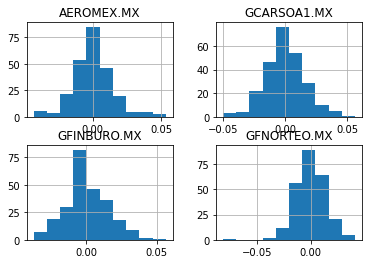

In [44]:
assets_mx.pct_change(periods=1).hist()

# 2. Graficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios `AEROMEX.MX`, así como el volumen de transacciones.

In [46]:
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = datetime.today()
aero_mx = web.DataReader(ticker, data_source='yahoo', start=start, end=end)
aero_mx
# Se extraen los precios de cierre y los volúmenes de transacción
clos_aero_mx = aero_mx['Adj Close']

# Se extraen los volúmenes de transacción
vol_aero_mx = aero_mx['Volume']

# Se verifican las dimensiones
clos_aero_mx.shape, vol_aero_mx.shape

((1477,), (1477,))

El gráfico de esta serie se obtiene de forma simple mediante el siguiente comando

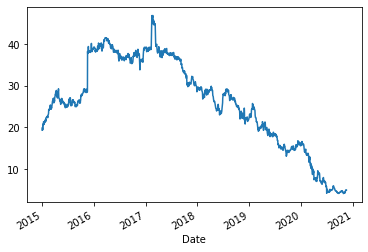

In [47]:
clos_aero_mx.plot()

De forma similar, se grafica la serie de volúmenes de transacción

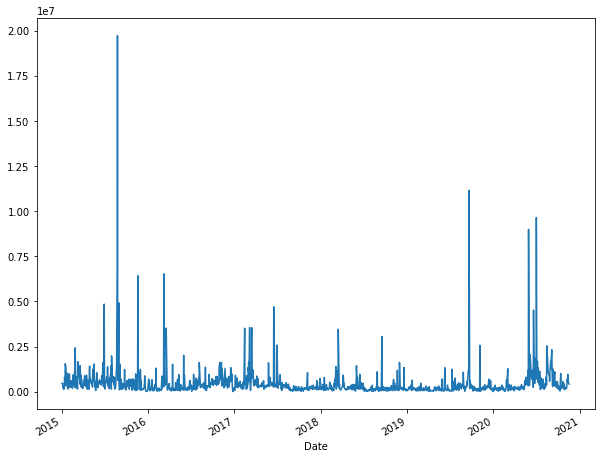

In [52]:
vol_aero_mx.plot(figsize=(10,8))

Usualmente, es conveniente graficar al precio de cierre de una acción en conjunto con su volumen de transacciones. El siguiente es un ejemplo de esta clase de graficas para el caso de Aeroméxico.

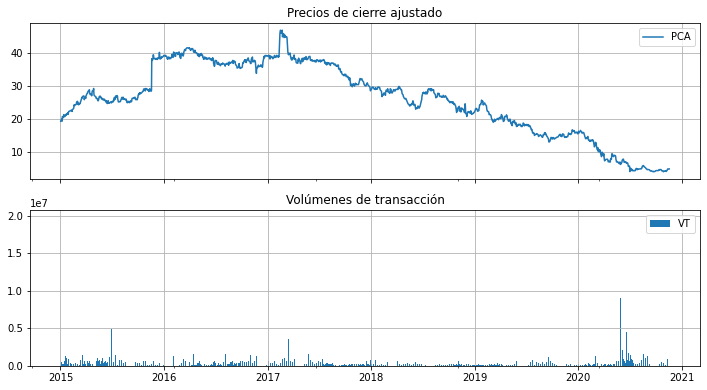

In [60]:
# Gráfica de los precios de cierre ajustados y los volúmenes de transacción 
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,7))

clos_aero_mx.plot(ax=ax[0], label='PCA')
ax[0].legend()
ax[0].set_title('Precios de cierre ajustado')
ax[0].grid()

ax[1].bar(vol_aero_mx.index, vol_aero_mx.values, label='VT')
ax[1].legend()
ax[1].set_title('Volúmenes de transacción')
ax[1].grid()


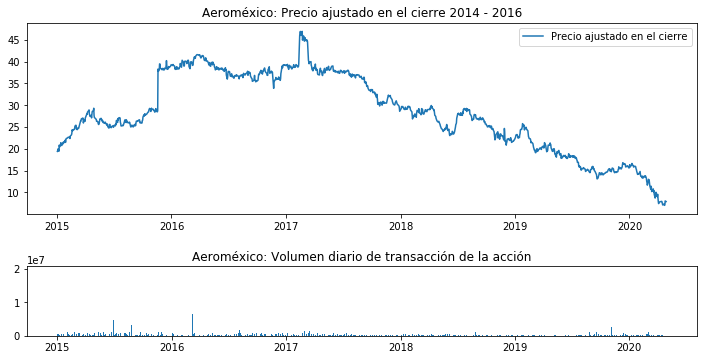

In [91]:
############## Forma de graficar 1
top = plt.subplot2grid((4,4), (0, 0), rowspan=2, colspan=4)
top.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado en el cierre')
plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc='best')
bottom = plt.subplot2grid((4,4), (2, 0), rowspan=1, colspan=4)
bottom.bar(vol_aero_mx.index, vol_aero_mx)
plt.title('Aeroméxico: Volumen diario de transacción de la acción')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)


############## Otra forma de graficar
# plt.figure(figsize=(10,10))
# plt.subplot(2,1,1)
# plt.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado en el cierre')
# plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
# plt.legend(loc='best')
# plt.xlim([clos_aero_mx.index[0],clos_aero_mx.index[-1]])
# plt.show()

# plt.figure(figsize=(10,5))
# plt.subplot(2,1,2)
# plt.bar(vol_aero_mx.index, vol_aero_mx)
# plt.title('Aeroméxico: Volumen diario de transacción de la acción')
# plt.xlabel('Date')
# plt.xlim([vol_aero_mx.index[0],vol_aero_mx.index[-1]])
# plt.ylim([0,.8e7])
# plt.show()

Otro procedimiento que se efectúa con frecuencia, es el cálculo de promedios y desviaciones móviles para la serie de precios. Los promedios móviles se calculan mediante:

In [77]:
# Realizar una media móvil con ventana de 20 y 100 para los precios de cierre ajustado
short_rollmean = clos_aero_mx.rolling(window=20).mean()
long_rollmean = clos_aero_mx.rolling(window=100).mean()

Grafiquemos los precios junto con las medias móviles que acabamos de calcular

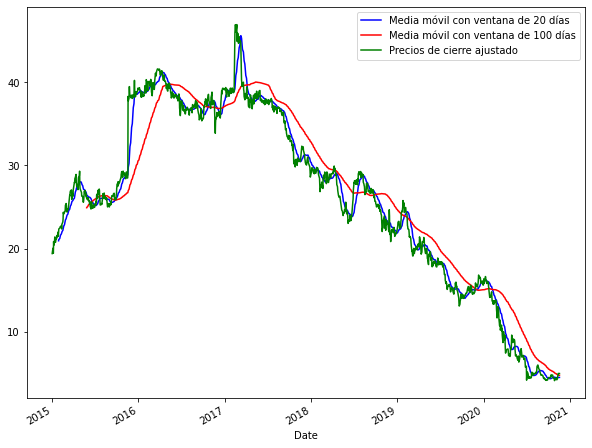

In [78]:
# Gráfica de los precios de cierre ajustados y sus medias móviles
short_rollmean.plot(figsize=(10,8), label='Media móvil con ventana de 20 días', c='b')
long_rollmean.plot(label='Media móvil con ventana de 100 días', c='r')
clos_aero_mx.plot(label='Precios de cierre ajustado', c='g')
plt.legend()
plt.show()

Las desviaciones estándar móviles se calculan con

In [81]:
short_rollstd_AM_AC = clos_aero_mx.rolling(window=20).std()
long_rollstd_AM_AC = clos_aero_mx.rolling(window=100).std()

y los gráficos...

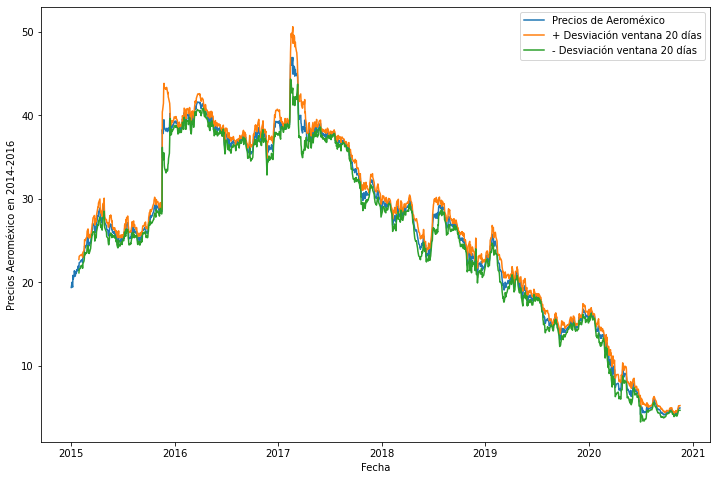

In [82]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+short_rollstd_AM_AC, label = '+ Desviación ventana 20 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-short_rollstd_AM_AC, label = '- Desviación ventana 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

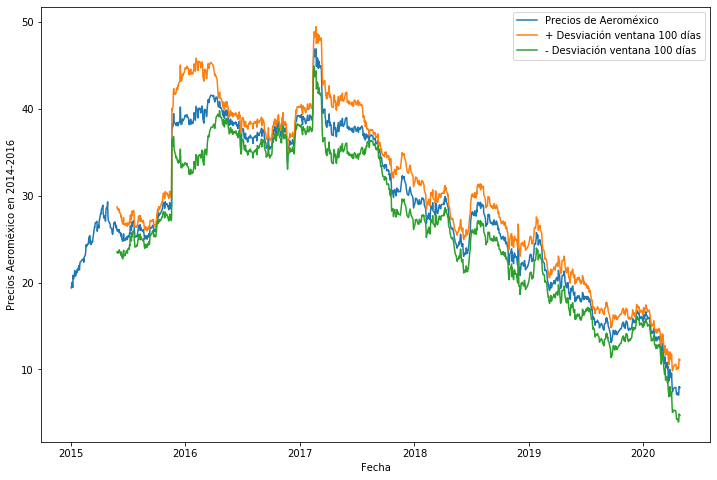

In [96]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+long_rollstd_AM_AC, label = '+ Desviación ventana 100 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-long_rollstd_AM_AC, label = '- Desviación ventana 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

Podemos graficar los precios de las acciones americanas

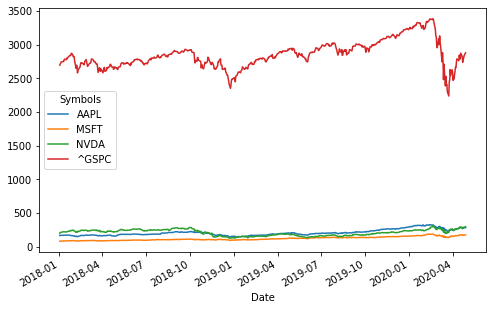

In [97]:
closes.plot(figsize=(8,5))

Sin embargo, vemos que los precios de cierre del índice S&P500 están muy por encima de los precios de cierre de los activos, lo cual dificulta la visualización. Entonces, obtenemos el gráfico de solo los activos

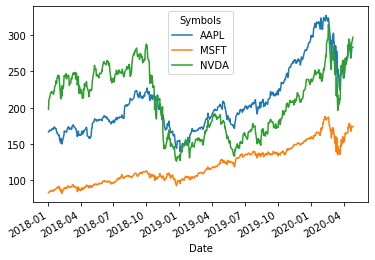

In [98]:
closes[['AAPL','MSFT','NVDA']].plot()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modified by Oscar Jaramillo Z.
</footer>